In [11]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [12]:
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [13]:
training_set = train_datagen.flow_from_directory('C:\\Skin-cancer-detection-project\svmModel\\New_Cleaned_DermMel\\train_sep', target_size=(200,200), batch_size=32 , class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('C:\\Skin-cancer-detection-project\svmModel\\New_Cleaned_DermMel\\test', target_size=(200,200), batch_size=32 , class_mode='binary')

Found 10682 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [14]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [15]:
cnn = tf.keras.models.Sequential()
# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[200, 200, 3]))
# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())
# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
# For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [16]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)      

In [19]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 28)

334/334 [==============================] - 219s 653ms/step - loss: 0.2359 - accuracy: 0.8938 - val_loss: 0.2740 - val_accuracy: 0.8832
Epoch 20/20
334/334 [==============================] - 212s 634ms/step - loss: 0.2476 - accuracy: 0.8867 - val_loss: 0.2786 - val_accuracy: 0.8691
Epoch 1/28
334/334 [==============================] - 229s 682ms/step - loss: 0.2395 - accuracy: 0.8913 - val_loss: 0.2747 - val_accuracy: 0.8905
Epoch 2/28
334/334 [==============================] - 195s 582ms/step - loss: 0.2328 - accuracy: 0.8940 - val_loss: 0.2604 - val_accuracy: 0.8728
Epoch 3/28
334/334 [==============================] - 196s 588ms/step - loss: 0.2334 - accuracy: 0.8947 - val_loss: 0.2628 - val_accuracy: 0.8719
Epoch 4/28
334/334 [==============================] - 207s 620ms/step - loss: 0.2236 - accuracy: 0.8999 - val_loss: 0.2710 - val_accuracy: 0.8905
Epoch 5/28
334/334 [==============================] - 203s 606ms/step - loss: 0.2175 - accuracy: 0.9020 - val_loss: 0.2975 - val_accur

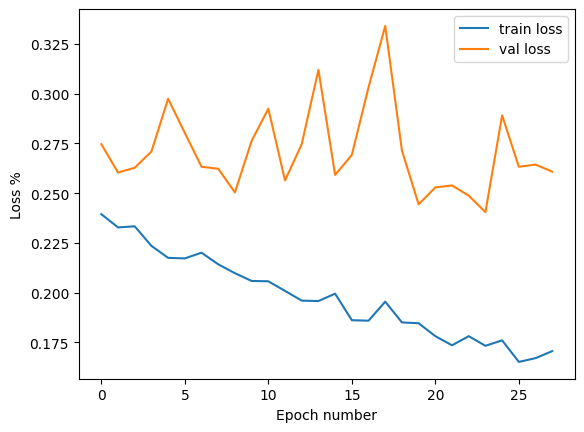

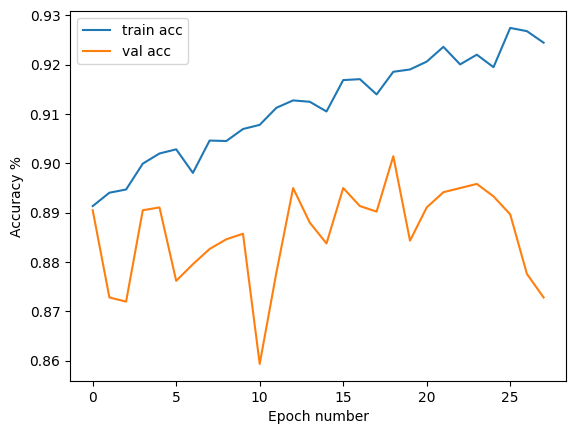

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel("Epoch number")
plt.ylabel("Loss %")
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel("Epoch number")
plt.ylabel("Accuracy %")
plt.show()
plt.savefig('AccVal_acc')

In [21]:
from tensorflow.keras.models import load_model

cnn.save('model_melanoma_non_new_cleaned_2512.h5')
from tensorflow.keras.models import load_model

# load model
model = load_model('model_melanoma_non_new_cleaned_2512.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)      

In [22]:
from tensorflow.keras.models import load_model

# load model
model = load_model('model_melanoma_non_new_2512.h5')
model.summary()

OSError: No file or directory found at model_melanoma_non_new_2512.h5

In [28]:
#uncleaned data

import numpy as np
from tensorflow.keras.preprocessing import image
import os
import  cv2
path = 'C:\Skin-cancer-detection-project\svmModel\\DermMel\\DermMel\\test\\Melanoma'
j = 0
pos = 0
neg = 0
x = []
y_test = []
y_pred = []
for i in os.listdir(path):

    test_image = image.load_img(path+'\\'+i, target_size = (200,200))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    #print(result)
    x.append(result[0])
    y_test.append(0)
    if result<0:
        y_pred.append(0)
    else:
        y_pred.append(1)

path = 'C:\Skin-cancer-detection-project\svmModel\DermMel\\DermMel\\valid\\NotMelanoma'

for i in os.listdir(path):


    test_image = image.load_img(path+'\\'+i, target_size = (200,200))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    #print(result)
    x.append(result[0])
    y_test.append(1)
    if result<0:
        y_pred.append(0)
    else:
        y_pred.append(1)



1/1 [==============================] - 0s 50ms/step


In [42]:

#for cleaned images:

import numpy as np
from tensorflow.keras.preprocessing import image
import os
import  cv2
path = 'C:\Skin-cancer-detection-project\svmModel\\DermMel\\DermMel\\valid\\Melanoma'
j = 0
pos = 0
neg = 0
x = []
y_test = []
y_pred = []
for i in os.listdir(path):
    j = j +1
    src = cv2.imread(path + '\\' + i)
    grayScale = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
    # cv2.imshow("GrayScale", grayScale)
    # cv2.imwrite('grayScale_sample1.jpg', grayScale, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

    # Kernel for the morphological filtering
    kernel = cv2.getStructuringElement(1, (17, 17))

    # Perform the blackHat filtering on the grayscale image to find the
    # hair countours
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    # cv2.imshow("BlackHat", blackhat)
    # cv2.imwrite('blackhat_sample1.jpg', blackhat, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

    # intensify the hair countours in preparation for the inpainting
    # algorithm
    ret, thresh2 = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)
    # print(thresh2.shape)
    # cv2.imshow("Thresholded Mask", thresh2)
    # cv2.imwrite('thresholded_sample1.jpg', thresh2, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

    # inpaint the original image depending on the mask
    dst = cv2.inpaint(src, thresh2, 1, cv2.INPAINT_TELEA)
    # cv2.imshow("InPaint", dst)
    cv2.imwrite( 'C:\\Skin-cancer-detection-project\\svmModel\\New_Cleaned_DermMel\\valid\\Melanoma'+"\\"+i, dst, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
    test_image = image.load_img('C:\\Skin-cancer-detection-project\\svmModel\\New_Cleaned_DermMel\\valid\\Melanoma'+'\\'+i, target_size = (200,200))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    #print(result)
    x.append(result[0])
    y_test.append(0)
    if result<0:
        y_pred.append(0)
    else:
        y_pred.append(1)

    print(result[0])
    if j>3000:
        break

path = 'C:\Skin-cancer-detection-project\svmModel\DermMel\\DermMel\\valid\\NotMelanoma'

j = 0

for i in os.listdir(path):

    j = j+1

    src = cv2.imread(path + '\\' + i)
    grayScale = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
    # cv2.imshow("GrayScale", grayScale)
    # cv2.imwrite('grayScale_sample1.jpg', grayScale, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

    # Kernel for the morphological filtering
    kernel = cv2.getStructuringElement(1, (17, 17))

    # Perform the blackHat filtering on the grayscale image to find the
    # hair countours
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    # cv2.imshow("BlackHat", blackhat)
    # cv2.imwrite('blackhat_sample1.jpg', blackhat, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

    # intensify the hair countours in preparation for the inpainting
    # algorithm
    ret, thresh2 = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)
    # print(thresh2.shape)
    # cv2.imshow("Thresholded Mask", thresh2)
    # cv2.imwrite('thresholded_sample1.jpg', thresh2, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

    # inpaint the original image depending on the mask
    dst = cv2.inpaint(src, thresh2, 1, cv2.INPAINT_TELEA)
    # cv2.imshow("InPaint", dst)
    cv2.imwrite( 'C:\\Skin-cancer-detection-project\\svmModel\\New_Cleaned_DermMel\\valid\\NotMelanoma'+"\\"+i, dst, [int(cv2.IMWRITE_JPEG_QUALITY), 90])


    test_image = image.load_img('C:\\Skin-cancer-detection-project\\svmModel\\New_Cleaned_DermMel\\valid\\NotMelanoma'+'\\'+i, target_size = (200,200))
    test_image = image.img_to_array(test_image)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    #print(result)
    x.append(result[0])
    y_test.append(1)
    if result<0:
        y_pred.append(0)
    else:
        y_pred.append(1)

    print(result[0])
    if j>3000:
        break



1/1 [==============================] - 0s 50ms/step
[-4.2042656]
1/1 [==============================] - 0s 55ms/step
[-4.7126455]
1/1 [==============================] - 0s 45ms/step
[-2.9952197]
1/1 [==============================] - 0s 105ms/step
[-1.6161269]
1/1 [==============================] - 0s 45ms/step
[-3.3764243]
1/1 [==============================] - 0s 125ms/step
[-1.5966992]
1/1 [==============================] - 0s 182ms/step
[-1.5683764]
1/1 [==============================] - 0s 57ms/step
[0.3535045]
1/1 [==============================] - 0s 57ms/step
[-3.4224317]
1/1 [==============================] - 0s 147ms/step
[-5.335687]
1/1 [==============================] - 0s 187ms/step
[-3.1337488]
1/1 [==============================] - 0s 45ms/step
[-5.3933425]
1/1 [==============================] - 0s 51ms/step
[-1.2920871]
1/1 [==============================] - 0s 35ms/step
[-7.159304]
1/1 [==============================] - 0s 43ms/step
[-6.9220424]
1/1 [==================

In [39]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

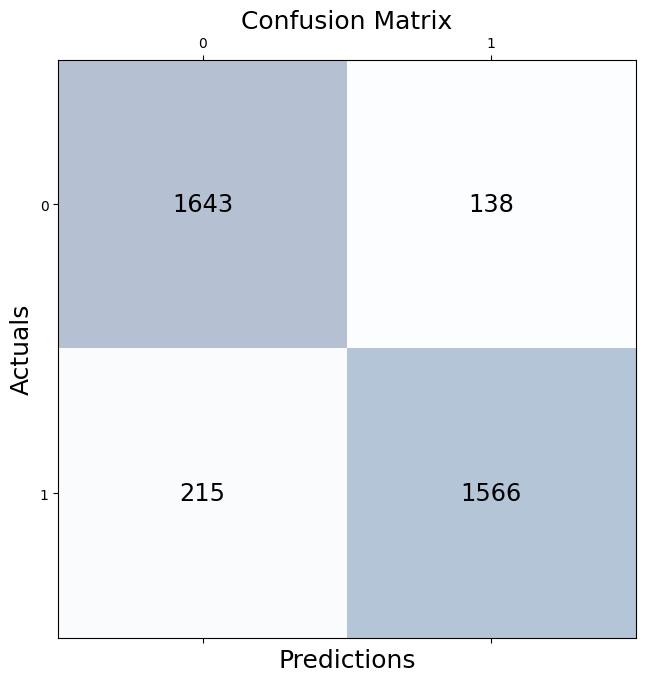

In [43]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [44]:

sum = 0
for i in conf_matrix:
    for j in i:
        sum = sum+j
print((conf_matrix[0,0]+conf_matrix[1,1])/sum)

0.9008983717012914


In [37]:
#skip this

import numpy as np
from tensorflow.keras.preprocessing import image
import os
path = 'C:\SCDProject\svmModel\Pretraining\\MEL'
j = 0
pos = 0
neg = 0

test_image = image.load_img('C:\Skin-cancer-detection-project\svmModel\Pretraining\MEL\ISIC_0000030_downsampled.jpg', target_size = (200,200))
test_image = image.img_to_array(test_image)
#test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print(result)


1/1 [==============================] - 0s 200ms/step
[[1287.107]]


1/1 [==============================] - 0s 364ms/step


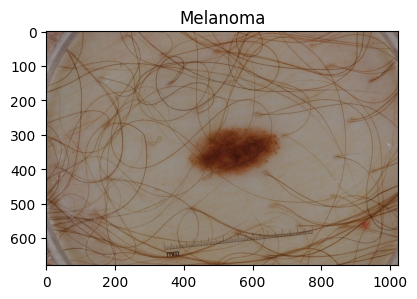

In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
#from tensorflow.keras.preprocessing.image import imread
import os
import cv2
path = 'C:\\ISIC_2019_Training_Input\\ISIC_0013147_downsampled.jpg'
test_image = image.load_img(path, target_size = (200,200))
img = image.load_img(path)


test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
#test_image = test_image.reshape(100,100)

    #print(result)
#x.append(result[0])
#y_test.append(0)

if result<0:
    plt.figure(figsize = (10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Non-melanoma')
    #print("Non-melanoma")

else:
    plt.figure(figsize = (10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Melanoma')
    #print("Melanoma")